In [1]:
import numpy as np
import pandas as pd
import math
import itertools 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sns.set_theme(font="Arial",
        rc={
 "axes.axisbelow": False,
 "axes.edgecolor": "lightgrey",
 "axes.facecolor": "None",
 "axes.grid": False,
 "axes.labelcolor": "dimgrey",
 "axes.spines.right": False,
 "axes.spines.top": False,
 "figure.facecolor": "white",
 "lines.solid_capstyle": "round",
 "patch.edgecolor": "w",
 "patch.force_edgecolor": True,
 "text.color": "dimgrey",
 "xtick.bottom": False,
 "xtick.color": "dimgrey",
 "xtick.direction": "out",
 "xtick.top": False,
 "ytick.color": "dimgrey",
 "ytick.direction": "out",
 "ytick.left": False,
 "ytick.right": False})

In [6]:
import kaggle

kaggle.api.authenticate()

print(kaggle.api.dataset_list_files('prajwaldongre/nvidia-corp-share-price-2000-2024').files)
kaggle.api.dataset_download_files('prajwaldongre/nvidia-corp-share-price-2000-2024', path='.', unzip=True)

[]
Dataset URL: https://www.kaggle.com/datasets/prajwaldongre/nvidia-corp-share-price-2000-2024


In [32]:
df = pd.read_csv('NVDA.csv')

In [34]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,0.98,0.99,0.92,0.98,0.89,30091200
1,2000-01-04,0.96,0.96,0.90,0.95,0.87,30048000
2,2000-01-05,0.92,0.94,0.90,0.92,0.84,18835200
3,2000-01-06,0.92,0.92,0.82,0.86,0.79,12048000
4,2000-01-07,0.85,0.88,0.84,0.87,0.80,7118400
5,2000-01-10,0.88,0.94,0.86,0.90,0.83,23985600
6,2000-01-11,0.90,0.91,0.86,0.86,0.79,14812800
7,2000-01-12,0.86,0.87,0.83,0.84,0.77,12355200
8,2000-01-13,0.84,0.89,0.83,0.88,0.81,13219200
9,2000-01-14,0.89,0.95,0.89,0.92,0.84,60456000


In [35]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df['date'] = pd.to_datetime(df['date'])
df.index = df['date']
df = df.drop(columns=['date'])
min(df.index), max(df.index)

(Timestamp('2000-01-03 00:00:00'), Timestamp('2024-04-24 00:00:00'))

In [36]:
df.columns

Index(['open', 'high', 'low', 'close', 'adj_close', 'volume'], dtype='object')

In [37]:
df.head()

,open,high,low,close,adj_close,volume
date,,,,,,
2000-01-03,0.98,0.99,0.92,0.98,0.89,30091200
2000-01-04,0.96,0.96,0.90,0.95,0.87,30048000
2000-01-05,0.92,0.94,0.90,0.92,0.84,18835200
2000-01-06,0.92,0.92,0.82,0.86,0.79,12048000
2000-01-07,0.85,0.88,0.84,0.87,0.80,7118400


In [18]:
import mplfinance as mpf

In [121]:
def plot_stocks(year,month=None):
    if month == None:
        dates = list(pd.date_range(start='{}-12-31'.format(year-1), periods=13, freq='MS'))
        for i in range(len(dates)-1):
            mpf.plot(df[dates[i]:dates[i+1]], type='candle', style='charles',
                title='NVIDIA Stock Prices in year {} {}'.format(dates[i].strftime('%Y'), dates[i].month_name()),
                ylabel='Price')
            plt.show()
    else:
        start_date = pd.Timestamp(year, month, 1)
        end_date = start_date + pd.offsets.MonthEnd(0)
        dates = list(pd.date_range(start=start_date, end=end_date, freq='D'))
        available_dates = df.index.intersection(dates)
        filtered_df = df.loc[available_dates]
        if len(filtered_df) == 0:
            print('No data available for {} {}'.format(start_date.strftime('%Y'), start_date.month_name()))
        else:
            mpf.plot(filtered_df, type='candle', style='charles',
                title='NVIDIA Stock Prices during {} {}'.format(filtered_df.index[0].strftime('%Y'), filtered_df.index[0].month_name()),
                ylabel='Price')
            plt.show()


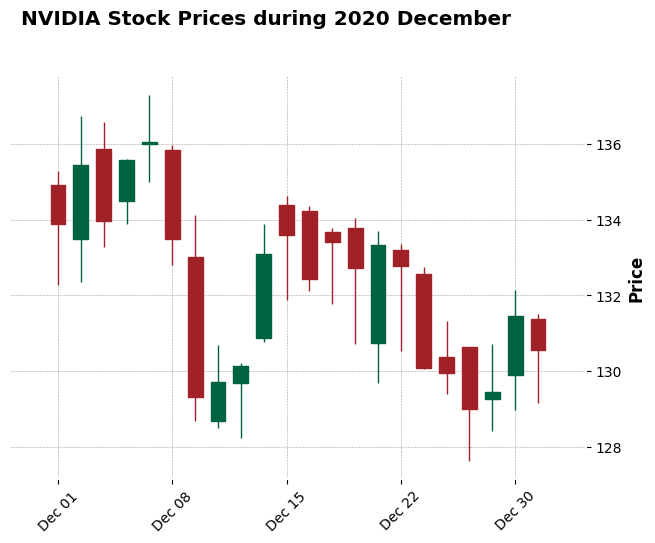

In [122]:
plot_stocks(2020, 12)

In [123]:
plot_stocks(2024,12)

No data available for 2024 December
